In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

def get_risk(alpha, M = 1000):
    X = np.random.uniform(-2, 2, size=M)
    epsilon = np.random.uniform(-1, 1, size=M)
    Y = 2 * X + epsilon
    
    loss = np.mean((Y - alpha * X) ** 2)
    
    return loss


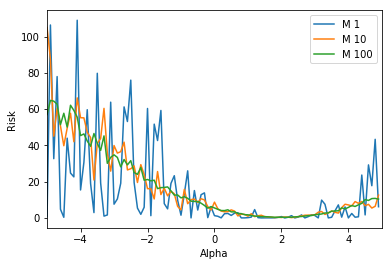

In [3]:

def lowest_risk(value, counts, step = 0.1):
    vals = np.arange(-value, value, step)
    
    
    for M in counts:
        risks = [get_risk(x, M) for x in vals]
        plt.plot(vals, risks, label='M ' + str(M))
        
        
    plt.ylabel('Risk')
    plt.xlabel('Alpha')
    plt.legend()
    plt.xlim((-5, 5))
    plt.show()
        
    
lowest_risk(5, [1, 10, 100])

In [4]:
get_risk(2.5)

0.6729010845607725

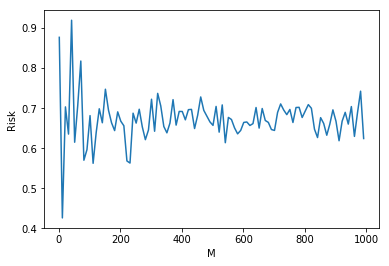

In [5]:
def plot_approximation():
    vals = np.arange(1, 1000, 10)
    
    risks = np.array([])
    
    for M in vals:
        risks = np.append(risks, get_risk(2.5, M))
        
    plt.plot(vals, risks)
    plt.ylabel('Risk')
    plt.xlabel('M')
    plt.show()
    
plot_approximation()

This plot doesn't really tell anything but the value seems to be +-0.05 at M of about 100.

In [199]:
data = pd.read_csv('wine.csv', delimiter=';')

Y = data['alcohol'].as_matrix()
data = data.drop('alcohol', axis=1)
data['bias'] = 1
X = data.as_matrix()


for i in range(X.shape[1] - 1):
    mini = np.amin(X[:,i])
    maxi = np.amax(X[:,i])
    X[:,i] = (X[:,i] - mini) / (maxi - mini)
    


X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [348]:


def loss(x, y, theta):
    return (np.square(np.matmul(x, theta) - y))

def gradient(x, y, theta):
    return 2 * ((np.matmul(x, theta) - y) @ x)


def stochastic_gradient_descent(X, Y, theta, step, rate, batch=10, ada=False):
    losshist = np.array([])
    gradhist = np.array([])
    valhist = np.array([])
    i = 1
    gradsum = np.zeros(12)
    
    while(i < 10000):
        valhist = np.append(valhist, loss(X_test, y_test, theta).mean())
        randoms = np.random.choice(range(len(Y)), batch)
        x = X[randoms]
        y = Y[randoms]
        
        
        l = loss(x, y, theta)
        g = gradient(x, y, theta)
        
        gradsum = np.append(gradsum, g)
        
        if ada:
            upd = step / (rate + np.sqrt(np.sum(np.square(gradsum))))
        else:
            upd = step / (1 + step * rate * i)
            
        theta = theta - upd * (g)
        
        losshist = np.append(losshist, l.mean())
        
        i = i + 1
        
        
    return (losshist, gradhist, valhist, theta)
    
    

    

1.462587418631437

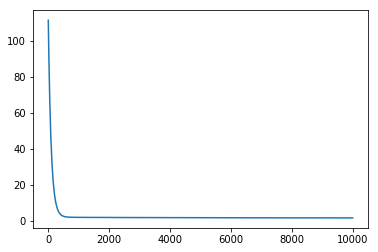

In [350]:
l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, 3)
l.shape

plt.plot(range(len(v)), v)
v[-1]

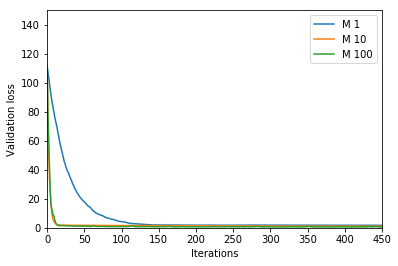

In [319]:
M = [1, 10, 100, 1000]

for i in M:
    l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, i)
    plt.xlabel('Iterations')
    plt.ylabel('Validation loss')
    plt.ylim(0, 150)
    plt.xlim(0, 450)
    plt.plot(range(len(v)), v, label='M ' + str(i))
    plt.legend()
    

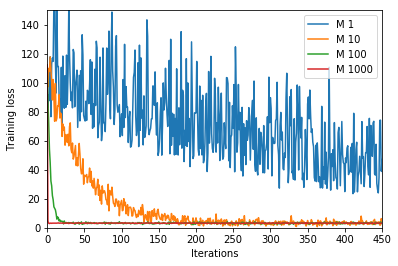

In [260]:
for i in M:
    l, g, v, theta = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.0005, 0.5, i)
    plt.xlabel('Iterations')
    plt.ylabel('Training loss')
    plt.ylim(0, 150)
    plt.xlim(0, 450)
    plt.plot(range(len(v)), l, label='M ' + str(i))
    plt.legend()

[ 4.92978106e+00  1.32950727e+00  7.30561564e-01  1.42069913e+01
 -4.58426605e-01 -9.55240657e-01  1.05314887e-02 -3.26236726e+01
  2.54174476e+00  8.57697161e-01  6.29488189e-01  1.04278359e+01]


0.15295238935118435

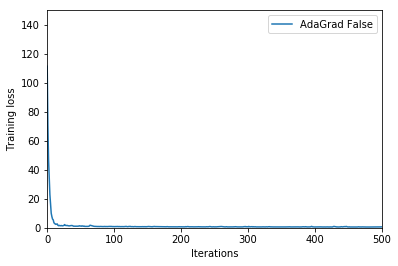

In [362]:
vals = [False]
for i in vals:
    l, g, v, t = stochastic_gradient_descent(X_train, y_train, np.zeros(12), 0.005, 0.0001, 100, i)
    print(t)
    plt.xlabel('Iterations')
    plt.ylabel('Training loss')
    plt.ylim(0, 150)
    plt.xlim(0, 500)
    plt.plot(range(len(v)), v, label='AdaGrad ' + str(i))
    plt.legend()
v[-1]

In [316]:
loss(X_test, y_test, t).mean()

nan

In [334]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
((reg.predict(X_test) - y_test)**2).mean()

0.14134828778147165